## Homework3: Improve/evaluate/interpret your midterm project

This is not a group project. This is an individual's two weeks homework

### Your tasks


1. Data cleaning and preparation. Be careful with those missing data and outliers.
2. Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.
3. Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.
4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.
5. Use Shapley summary plot to explain your model.
6. Submit all in a Jupyter file and HTML format on canvas

##### Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt

##### Read in Data

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Lets enconder the string values (Objects) into numerical values so that the classifer can read in the data and replace the NaN values in the data...We do it for both test and train data

In [6]:
from sklearn.preprocessing import LabelEncoder
for col in train_data.columns:
    if train_data[col].dtype == "O":
        train_data[col] = train_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
for col in test_data.columns:
    if test_data[col].dtype == "O":
        test_data[col] = test_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        test_data[col] = le.fit_transform(test_data[col])

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Saving the columns names later for the transformation

In [8]:
column_names = train_data.columns
test_col_names = test_data.columns

In [9]:
column_names

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Replacing nan values with mean values of that column

In [10]:
from sklearn.impute import SimpleImputer
values = train_data.values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imp.fit_transform(values)
imp.fit(train_data)
train_data= pd.DataFrame(imp.transform(train_data))
train_data = train_data.applymap(np.int64)
train_data.columns = column_names

In [11]:
from sklearn.impute import SimpleImputer
values = test_data.values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imp.fit_transform(values)
imp.fit(test_data)
test_data= pd.DataFrame(imp.transform(test_data))
test_data = test_data.applymap(np.int64)
test_data.columns = test_col_names

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int64
 6   Alley          1460 non-null   int64
 7   LotShape       1460 non-null   int64
 8   LandContour    1460 non-null   int64
 9   Utilities      1460 non-null   int64
 10  LotConfig      1460 non-null   int64
 11  LandSlope      1460 non-null   int64
 12  Neighborhood   1460 non-null   int64
 13  Condition1     1460 non-null   int64
 14  Condition2     1460 non-null   int64
 15  BldgType       1460 non-null   int64
 16  HouseStyle     1460 non-null   int64
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   int64
 19  YearBu

In [13]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


##### Check whether all the missing values have been filled

In [435]:
train_data.isnull().sum()/len(train_data)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

##### Seperated data values and targeted values

In [436]:
x = train_data.drop(["SalePrice"],axis=1).values

In [437]:
y = train_data["SalePrice"].values

##### Random Forest Feature Selection

In [438]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1,max_depth=10)
model.fit(x,y)

RandomForestRegressor(max_depth=10, random_state=1)

In [439]:
train_data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [440]:
model.feature_importances_

array([3.92631147e-03, 1.34965872e-03, 2.27457659e-03, 6.10900672e-03,
       1.32831423e-02, 1.11117428e-05, 1.85179972e-04, 1.23180267e-03,
       1.14837535e-03, 1.92539467e-06, 5.51376720e-04, 6.72523665e-04,
       6.00821326e-03, 3.50816092e-04, 1.73376267e-04, 1.96531862e-04,
       5.93514438e-04, 5.88741158e-01, 4.14164536e-03, 9.33047298e-03,
       6.90511142e-03, 6.33238577e-04, 3.29626264e-04, 1.09725117e-03,
       1.13390108e-03, 9.62627609e-04, 4.50325359e-03, 2.52598787e-03,
       2.90482869e-04, 2.81084456e-04, 4.72448831e-03, 2.90096159e-04,
       1.94484075e-03, 1.31353493e-03, 2.62116089e-02, 5.45682099e-04,
       6.52529026e-04, 4.89682152e-03, 3.95679106e-02, 9.06150642e-05,
       5.36933776e-04, 2.92768143e-03, 1.37109001e-04, 2.39475047e-02,
       3.35331853e-02, 1.09157075e-04, 1.06603931e-01, 7.73434650e-04,
       3.59886293e-04, 9.04656128e-03, 9.32669699e-04, 2.36992116e-03,
       1.22594693e-03, 3.01778696e-03, 1.10023433e-02, 6.01145397e-04,
      

In [441]:
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))

##### Graphing of Feature Importances

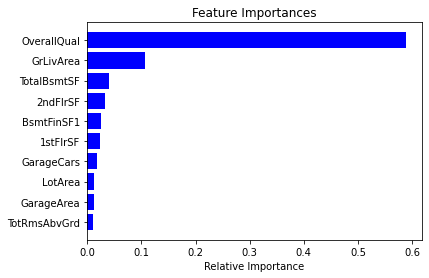

In [442]:
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [443]:
random_for_ftr = [features[i] for i in indices]

In [444]:
random_for_ftr

['TotRmsAbvGrd',
 'GarageArea',
 'LotArea',
 'GarageCars',
 '1stFlrSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 'TotalBsmtSF',
 'GrLivArea',
 'OverallQual']

In [462]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62,7917,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,175000
1456,1457,20,3,85,13175,1,1,3,3,0,...,0,3,2,1,0,2,2010,8,4,210000
1457,1458,70,3,66,9042,1,1,3,3,0,...,0,3,0,3,2500,5,2010,8,4,266500
1458,1459,20,3,68,9717,1,1,3,3,0,...,0,3,4,1,0,4,2010,8,4,142125


In [459]:
x = np.array(train_data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']].values)
y = np.array(train_data["SalePrice"].values)

In [460]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state= 101)

##### MODEL EXAMPLE

In [461]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train)
pred = regr.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-squared Error:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 54952.93979019801
Mean Squared Error: 6513908497.213052
Root Mean Squared Error: 80708.78822788167
R-squared Error: -0.03513136095107261


##### Calculate the variance of the all the numberical features

In [15]:
var_check = pd.Series.sort_values(train_data.var())
print(var_check)
training_ftr = var_check[var_check > 1].index
training_ftr

Utilities       6.849315e-04
Street          4.095505e-03
PoolQC          1.979729e-02
KitchenAbvGr    4.854892e-02
BsmtHalfBath    5.700283e-02
                    ...     
BsmtFinSF1      2.080255e+05
MiscVal         2.461381e+05
GrLivArea       2.761296e+05
LotArea         9.962565e+07
SalePrice       6.311111e+09
Length: 81, dtype: float64


Index(['Fence', 'SaleCondition', 'OverallCond', 'BsmtExposure', 'FireplaceQu',
       'GarageFinish', 'BldgType', 'BsmtFinType2', 'BsmtQual', 'YrSold',
       'Electrical', 'OverallQual', 'LotShape', 'SaleType', 'LotConfig',
       'TotRmsAbvGrd', 'HeatingQC', 'HouseStyle', 'GarageType', 'BsmtFinType1',
       'MoSold', 'Exterior1st', 'Exterior2nd', 'Neighborhood', 'YearRemodAdd',
       'LotFrontage', 'GarageYrBlt', '3SsnPorch', 'YearBuilt', 'PoolArea',
       'MSSubClass', 'LowQualFinSF', 'ScreenPorch', 'EnclosedPorch',
       'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF2', 'MasVnrArea', 'GarageArea',
       '1stFlrSF', 'Id', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1',
       'MiscVal', 'GrLivArea', 'LotArea', 'SalePrice'],
      dtype='object')

##### Correlation Check

In [265]:
train_data = train_data[training_ftr]
df = train_data.corr()
df_1 = df[df > 0.5]
df_2 = df[df_1 < 1]
df_2

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BldgType,BsmtFinType2,BsmtQual,YrSold,...,1stFlrSF,Id,2ndFlrSF,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,MiscVal,GrLivArea,LotArea,SalePrice
Fence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtExposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FireplaceQu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageFinish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YrSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
corr_check = pd.Series.sort_values(df_2.apply(np.sum, axis=0))
drop_columns = np.array(corr_check[corr_check > 0].index)
drop_columns = np.delete(drop_columns,len(drop_columns)-1)
drop_columns = np.append(drop_columns,"Id")

In [267]:
drop_columns

array(['BsmtFinSF1', 'MSSubClass', 'BldgType', 'Exterior2nd',
       'Exterior1st', 'GarageArea', '2ndFlrSF', 'GarageYrBlt',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'YearBuilt',
       'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'Id'], dtype=object)

In [268]:
train_data = train_data.drop(drop_columns,axis=1)

In [269]:
train_data

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BsmtFinType2,BsmtQual,YrSold,Electrical,...,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,BsmtFinSF2,MasVnrArea,BsmtUnfSF,MiscVal,LotArea,SalePrice
0,4,4,5,3,3,2,6,2,2008,5,...,0,0,61,0,0,196,150,0,8450,208500
1,4,4,8,1,5,2,6,2,2007,5,...,0,0,0,298,0,0,284,0,9600,181500
2,4,4,5,2,5,2,6,2,2008,5,...,0,0,42,0,0,162,434,0,11250,223500
3,4,0,5,3,2,3,6,4,2006,5,...,0,272,35,0,0,0,540,0,9550,140000
4,4,4,5,0,5,2,6,2,2008,5,...,0,0,84,192,0,350,490,0,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,4,5,3,5,2,6,2,2007,5,...,0,0,40,0,0,0,953,0,7917,175000
1456,2,4,6,3,5,3,5,2,2010,5,...,0,0,0,349,163,119,589,0,13175,210000
1457,0,4,9,3,2,2,6,4,2010,5,...,0,0,60,0,0,0,877,2500,9042,266500
1458,4,4,6,2,3,3,5,4,2010,0,...,0,112,0,366,1029,0,0,0,9717,142125


##### Lets check our correlation again

In [270]:
train_data.corr()[train_data.corr() > 0.5]

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BsmtFinType2,BsmtQual,YrSold,Electrical,...,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,BsmtFinSF2,MasVnrArea,BsmtUnfSF,MiscVal,LotArea,SalePrice
Fence,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtExposure,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FireplaceQu,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageFinish,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YrSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
train_data

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BsmtFinType2,BsmtQual,YrSold,Electrical,...,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,BsmtFinSF2,MasVnrArea,BsmtUnfSF,MiscVal,LotArea,SalePrice
0,4,4,5,3,3,2,6,2,2008,5,...,0,0,61,0,0,196,150,0,8450,208500
1,4,4,8,1,5,2,6,2,2007,5,...,0,0,0,298,0,0,284,0,9600,181500
2,4,4,5,2,5,2,6,2,2008,5,...,0,0,42,0,0,162,434,0,11250,223500
3,4,0,5,3,2,3,6,4,2006,5,...,0,272,35,0,0,0,540,0,9550,140000
4,4,4,5,0,5,2,6,2,2008,5,...,0,0,84,192,0,350,490,0,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,4,5,3,5,2,6,2,2007,5,...,0,0,40,0,0,0,953,0,7917,175000
1456,2,4,6,3,5,3,5,2,2010,5,...,0,0,0,349,163,119,589,0,13175,210000
1457,0,4,9,3,2,2,6,4,2010,5,...,0,0,60,0,0,0,877,2500,9042,266500
1458,4,4,6,2,3,3,5,4,2010,0,...,0,112,0,366,1029,0,0,0,9717,142125


In [272]:
train_data.describe()

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BsmtFinType2,BsmtQual,YrSold,Electrical,...,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,BsmtFinSF2,MasVnrArea,BsmtUnfSF,MiscVal,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.504795,3.770548,5.575342,2.310274,3.087671,1.876712,5.586986,2.724658,2007.815753,4.595890,...,15.060959,21.954110,46.660274,94.244521,46.549315,103.681507,567.240411,43.489041,10516.828082,180921.195890
std,1.082912,1.100854,1.112799,1.165663,1.167523,1.191646,1.200854,1.278630,1.328095,1.328647,...,55.757415,61.119149,66.256028,125.338794,161.319273,180.569120,441.866955,496.123024,9981.264932,79442.502883
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,34900.000000
25%,4.000000,4.000000,5.000000,2.000000,2.000000,1.000000,6.000000,2.000000,2007.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,7553.500000,129975.000000
50%,4.000000,4.000000,5.000000,3.000000,3.000000,2.000000,6.000000,2.000000,2008.000000,5.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,477.500000,0.000000,9478.500000,163000.000000
75%,4.000000,4.000000,6.000000,3.000000,3.000000,3.000000,6.000000,4.000000,2009.000000,5.000000,...,0.000000,0.000000,68.000000,168.000000,0.000000,164.250000,808.000000,0.000000,11601.500000,214000.000000
max,4.000000,5.000000,9.000000,4.000000,5.000000,3.000000,6.000000,4.000000,2010.000000,5.000000,...,480.000000,552.000000,547.000000,857.000000,1474.000000,1600.000000,2336.000000,15500.000000,215245.000000,755000.000000


In [273]:
upper_lim = train_data['LotArea'].quantile(.95)
lower_lim = train_data['LotArea'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
train_data[(train_data['LotArea'] < upper_lim) & (train_data['LotArea'] > lower_lim)]

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BsmtFinType2,BsmtQual,YrSold,Electrical,...,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,BsmtFinSF2,MasVnrArea,BsmtUnfSF,MiscVal,LotArea,SalePrice
0,4,4,5,3,3,2,6,2,2008,5,...,0,0,61,0,0,196,150,0,8450,208500
1,4,4,8,1,5,2,6,2,2007,5,...,0,0,0,298,0,0,284,0,9600,181500
2,4,4,5,2,5,2,6,2,2008,5,...,0,0,42,0,0,162,434,0,11250,223500
3,4,0,5,3,2,3,6,4,2006,5,...,0,272,35,0,0,0,540,0,9550,140000
4,4,4,5,0,5,2,6,2,2008,5,...,0,0,84,192,0,350,490,0,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,4,5,3,5,2,6,2,2007,5,...,0,0,40,0,0,0,953,0,7917,175000
1456,2,4,6,3,5,3,5,2,2010,5,...,0,0,0,349,163,119,589,0,13175,210000
1457,0,4,9,3,2,2,6,4,2010,5,...,0,0,60,0,0,0,877,2500,9042,266500
1458,4,4,6,2,3,3,5,4,2010,0,...,0,112,0,366,1029,0,0,0,9717,142125


In [274]:
Q1 = train_data['LotArea'].quantile(0.25)
Q3 = train_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

7553.5 11601.5 4048.0


In [276]:
train_data = train_data[(train_data['LotArea'] < (Q3 + 1.5 * IQR)) & (train_data['LotArea'] > (Q1 - 1.5 * IQR))]

In [277]:
train_data.describe()

,Fence,SaleCondition,OverallCond,BsmtExposure,FireplaceQu,GarageFinish,BsmtFinType2,BsmtQual,YrSold,Electrical,...,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,BsmtFinSF2,MasVnrArea,BsmtUnfSF,MiscVal,LotArea,SalePrice
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,...,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,3.501078,3.771387,5.577283,2.338605,3.090582,1.889288,5.594536,2.728253,2007.824587,4.583034,...,14.442847,21.656362,45.171819,90.616104,43.389648,100.821711,568.539899,38.414091,9272.537024,178136.292595
std,1.080151,1.098495,1.105071,1.160971,1.143825,1.182897,1.189075,1.275469,1.325782,1.347035,...,54.195152,59.418996,63.498462,119.725354,153.444567,172.893471,442.508797,456.669597,3196.732418,75793.167741
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1491.000000,34900.000000
25%,4.000000,4.000000,5.000000,2.000000,2.000000,1.000000,6.000000,2.000000,2007.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,226.000000,0.000000,7429.000000,129000.000000
50%,4.000000,4.000000,5.000000,3.000000,3.000000,2.000000,6.000000,2.000000,2008.000000,5.000000,...,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,480.000000,0.000000,9286.000000,160000.000000
75%,4.000000,4.000000,6.000000,3.000000,3.000000,3.000000,6.000000,4.000000,2009.000000,5.000000,...,0.000000,0.000000,66.000000,168.000000,0.000000,163.500000,802.000000,0.000000,11231.500000,210000.000000
max,4.000000,5.000000,9.000000,4.000000,5.000000,3.000000,6.000000,4.000000,2010.000000,5.000000,...,480.000000,386.000000,547.000000,736.000000,1474.000000,1600.000000,2336.000000,15500.000000,17671.000000,745000.000000


### Formattting training splits

##### Selecting Features and Target values

In [331]:
#old train is the training data without selecting any features
#x = np.array(train_old.drop("SalePrice",axis=1).values)
x = np.array(train_data[random_for_ftr].values)
# x = np.array(train_data.drop("SalePrice",axis=1).values)
y = np.array(train_data['SalePrice'].values)
x_old = np.array(train_data.drop("SalePrice",axis=1).values)

##### Splitting the data

In [332]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state= 101)
x_train_old,x_test_old,y_train_old,y_test_old = train_test_split(x_old,y,test_size=0.3,random_state= 101)

##### Feature Scaling

In [333]:
from sklearn import preprocessing
sc_x = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
sc_w = preprocessing.StandardScaler()
sc_q = preprocessing.StandardScaler()

sc_x_old = preprocessing.StandardScaler()
sc_y_old = preprocessing.StandardScaler()
sc_w_old = preprocessing.StandardScaler()
sc_q_old = preprocessing.StandardScaler()



x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
x_test = sc_w.fit_transform(x_test)
y_test = sc_q.fit_transform(y_test.reshape(-1,1))

x_train_old = sc_x_old.fit_transform(x_train_old)
y_train_old = sc_y_old.fit_transform(y_train_old.reshape(-1,1))
x_test_old = sc_w_old.fit_transform(x_test_old)
y_test_old = sc_q_old.fit_transform(y_test_old.reshape(-1,1))


## Support Vector Machine Regression OLD

In [334]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train_old,y_train_old.ravel())
pred = regr.predict(x_test_old)
pred_svm = sc_y_old.inverse_transform(pred)
y_test_svm = sc_q_old.inverse_transform(y_test_old)
df_svm = pd.DataFrame({'Actual': y_test_svm.flatten(), 'Predicted': pred_svm.flatten()})
df_svm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_svm, pred_svm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_svm, pred_svm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_svm, pred_svm)))
print('R-squared Error:', metrics.r2_score(y_test_svm, pred_svm))

Mean Absolute Error: 19508.51940787636
Mean Squared Error: 1602719942.5425134
Root Mean Squared Error: 40033.98484466058
R-squared Error: 0.7453102578801554


## Support Vector Machine Regression Improvement

In [335]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train.ravel())
pred = regr.predict(x_test)
pred_svm = sc_y.inverse_transform(pred)
y_test_svm = sc_q.inverse_transform(y_test)

##### Dataframe of Actual vs prediction SVR

In [336]:
df_svm = pd.DataFrame({'Actual': y_test_svm.flatten(), 'Predicted': pred_svm.flatten()})
df_svm.head()

,Actual,Predicted
0,255000.0,232164.991956
1,145000.0,139196.162056
2,150500.0,133890.856623
3,412500.0,324521.488210
4,402861.0,352578.193076


##### Metrics of SVR Model

In [337]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_svm, pred_svm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_svm, pred_svm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_svm, pred_svm)))
print('R-squared Error:', metrics.r2_score(y_test_svm, pred_svm))

Mean Absolute Error: 32531.338148974835
Mean Squared Error: 2724421592.421966
Root Mean Squared Error: 52195.992110716375
R-squared Error: 0.5670595876538915


## Decision Tree Regression OLD

In [338]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train_old, y_train_old)
pred = dtr.predict(x_test_old)
pred_dtr = sc_y_old.inverse_transform(pred)
y_test_dtr = sc_q_old.inverse_transform(y_test_old)
df_dtr = pd.DataFrame({'Actual': y_test_dtr.flatten(), 'Predicted': pred_dtr.flatten()})
# df_dtr
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dtr, pred_dtr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dtr, pred_dtr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dtr, pred_dtr)))
print('R-squared Error:', metrics.r2_score(y_test_dtr, pred_dtr))

Mean Absolute Error: 26118.212328767124
Mean Squared Error: 1622994146.4908676
Root Mean Squared Error: 40286.40150833613
R-squared Error: 0.742088464952877


## Decision Tree Regression Improvement

In [339]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_dtr = sc_y.inverse_transform(pred_dtr)
y_test_dtr = sc_q.inverse_transform(y_test)

##### Dataframe of Actual vs prediction DTR 

In [340]:
df_dtr = pd.DataFrame({'Actual': y_test_dtr.flatten(), 'Predicted': pred_dtr.flatten()})
# df_dtr

In [341]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dtr, pred_dtr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dtr, pred_dtr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dtr, pred_dtr)))
print('R-squared Error:', metrics.r2_score(y_test_dtr, pred_dtr))

Mean Absolute Error: 42192.08904109589
Mean Squared Error: 5023661355.815068
Root Mean Squared Error: 70877.79169680069
R-squared Error: 0.20168522194823213


## KNN Regression OLD

In [342]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x_train_old, y_train_old)
pred = neigh.predict(x_test_old)
pred_knn = sc_y_old.inverse_transform(pred)
y_test_knn = sc_q_old.inverse_transform(y_test_old)
df_knn = pd.DataFrame({'Actual': y_test_knn.flatten(), 'Predicted': pred_knn.flatten()})
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_knn, pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_knn, pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn)))
print('R-squared Error:', metrics.r2_score(y_test_knn, pred_knn))

Mean Absolute Error: 25250.461643835613
Mean Squared Error: 1746479999.750411
Root Mean Squared Error: 41790.90809913576
R-squared Error: 0.7224652112032358


## KNN Regression Improvement

In [343]:
from sklearn.neighbors import KNeighborsRegressor
x_1 = list()
y_1 = list()
for i in range(1,21,2):
    #print(i)
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(x_train, y_train)
    pred = neigh.predict(x_test)
    pred_knn = sc_y.inverse_transform(pred)
    y_test_knn = sc_q.inverse_transform(y_test)
    metrics.r2_score(y_test_knn, pred_knn)
    x_1.append(i)
    y_1.append(metrics.r2_score(y_test_knn, pred_knn))
    
df = pd.DataFrame({"nums_of_neighs": x_1,"R^2 Coe":y_1})    

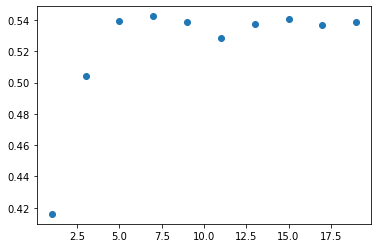

In [344]:
from matplotlib import pyplot as plt
plt.scatter(df.nums_of_neighs.astype(int),df["R^2 Coe"])

##### Selecting K-Neighbors = 3 based on the results above

In [345]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
pred_knn = sc_y.inverse_transform(pred)
y_test_knn = sc_q.inverse_transform(y_test)
metrics.r2_score(y_test_knn, pred_knn)
x_1.append(i)
y_1.append(metrics.r2_score(y_test_knn, pred_knn))

In [306]:
df_knn = pd.DataFrame({'Actual': y_test_knn.flatten(), 'Predicted': pred_knn.flatten()})
df_knn.head()

,Actual,Predicted
0,221000.0,202133.333333
1,230000.0,216533.333333
2,193000.0,178133.333333
3,101000.0,104666.666667
4,163500.0,165433.333333


In [346]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_knn, pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_knn, pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn)))
print('R-squared Error:', metrics.r2_score(y_test_knn, pred_knn))

Mean Absolute Error: 36435.54414003044
Mean Squared Error: 3119526824.135718
Root Mean Squared Error: 55852.7244110412
R-squared Error: 0.5042730415429464


## TEST.CSV WITH KNN Regression, Decision Tree Regression, and Support Vector Machine Regression

##### Data values

In [308]:
X = train_data[best_everything].values
Y = train_data["SalePrice"].values
x_test = test_data[best_everything]

NameError: name 'best_everything' is not defined

##### Feature Scaling

In [78]:
sc_x = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
sc_w = preprocessing.StandardScaler()
# sc_q = preprocessing.StandardScaler()

x_train = sc_x.fit_transform(X)
y_train = sc_y.fit_transform(Y.reshape(-1,1))
x_test = sc_w.fit_transform(x_test)
# y_test = sc_q.fit_transform(y_test.reshape(-1,1))

### KNN

In [79]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
pred_knn = sc_y.inverse_transform(pred)
df_knn = pd.DataFrame(pred_knn)
df_knn.rename(columns={0: "KNN_Prediction"}).head()

,KNN_Prediction
0,122966.666667
1,153683.333333
2,181833.333333
3,189000.000000
4,198166.666667


## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred = dtr.predict(x_test)
pred_dtr = sc_y.inverse_transform(pred)
df_dtr = pd.DataFrame(pred_dtr)
df_dtr.rename(columns={0: "dtr_Prediction"}).head()

,dtr_Prediction
0,134800.0
1,157900.0
2,143000.0
3,171500.0
4,189000.0


## Support Vector Machine Regressor

In [81]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train.ravel())
pred = regr.predict(x_test)
pred_svm = sc_y.inverse_transform(pred)
df_svm = pd.DataFrame(pred_svm)
df_svm.rename(columns={0: "svm_Prediction"}).head()

,svm_Prediction
0,132051.011564
1,164015.469367
2,201035.779856
3,196670.260238
4,180348.885342
